## Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Reading image

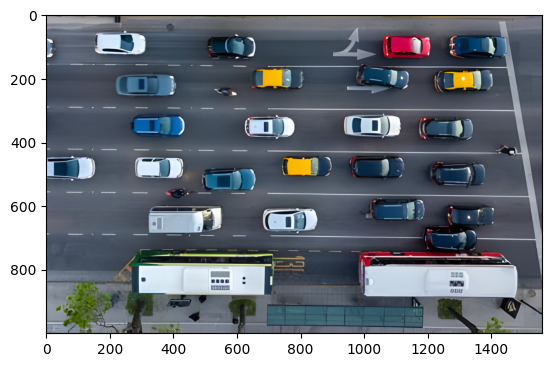

In [3]:
img = cv2.imread('car.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

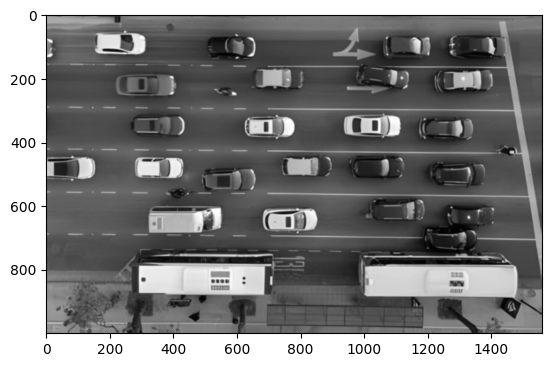

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert to grayscale
blurred = cv2.GaussianBlur(gray, (7, 7), 0) # Remove noise

# Greater Block Size -> stronger lines
# Greater c -> more smoothing and removing of background and details
plt.imshow(blurred, cmap='gray')

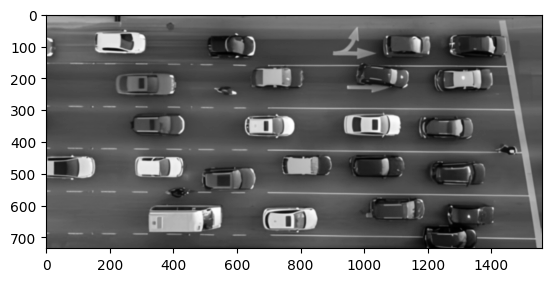

In [5]:
# Cropping image to remove the below or street
crop_img = blurred[0:735, :]
plt.imshow(crop_img, cmap='gray')

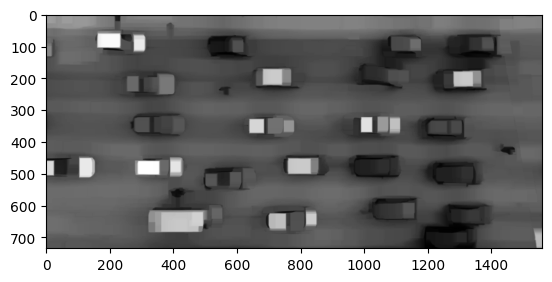

In [213]:
# Removing vertical and horizontal lines
opening = cv2.morphologyEx(crop_img, cv2.MORPH_OPEN, np.ones((31, 1), np.uint8)) # Vertical lines
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, np.ones((1, 31), np.uint8)) # Horizontal lines
plt.imshow(opening, cmap='gray')

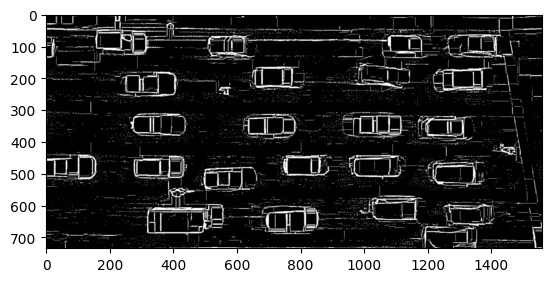

In [215]:
# Apply threshold to get binary image
th = cv2.adaptiveThreshold(opening, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 1)
th = cv2.GaussianBlur(th, (3, 3), 0) # Remove noise

plt.imshow(th, cmap='gray')

3196


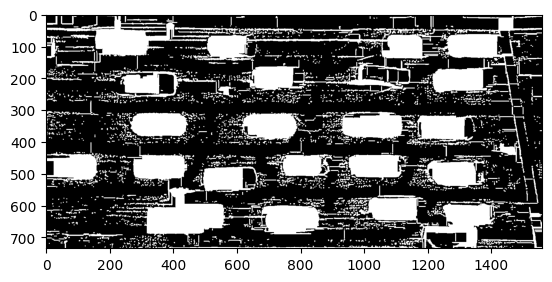

In [216]:
contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.drawContours(th, [contour], -1, 255, cv2.FILLED)

plt.imshow(th, cmap='gray')

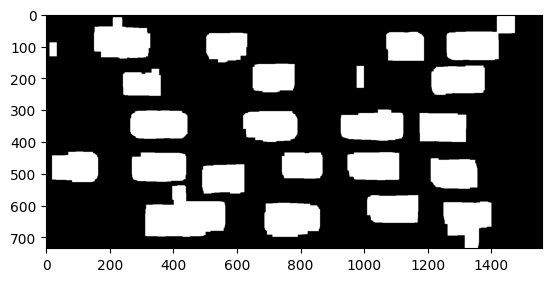

In [210]:
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, np.ones((27, 13), np.uint8))
opening = cv2.dilate(opening, np.ones((17,11), np.uint8))
cars = opening.copy()
plt.imshow(opening, cmap='gray')

In [211]:
cnts, _ = cv2.findContours(cars.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Number of cars found:", len(cnts))

Number of cars found: 23


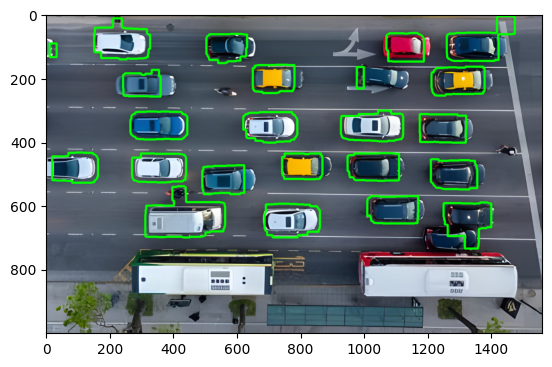

In [212]:
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]))
	cY = int((M["m01"] / M["m00"]))

	c = c.astype("float")
	c = c.astype("int")
	cv2.drawContours(img, [c], -1, (0, 255, 0), 6)

# show the output image
plt.imshow(img)